This is the example of using EM-algorithm to impute missing data. <br> In this case we use the data of air pollution, and the goal is to perform regression analysis to predict the value of PM2.5.<br>
To simulate the condition of a dataset with missing values, we will pick random rows and replace some features with NaN.<br>
In the end we will compare the R-squared value of EM-algorithm, original data and baseline method(KNN) as a metric.

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import utils
from continuous import *

Read the data and do some preprocessing.

In [22]:
truth_df = pd.read_csv("./data/original.csv")
X = truth_df.drop('PM2.5',axis=1)
display(X)
missing_result = utils.simulate_nan(X, nan_rate=0.6)
missing_df = missing_result['X']

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,16.0,2.0,0.53,0.18,-0.30,16.0,16.0,106.0,77.0,2.6
1,16.0,2.0,0.56,0.19,0.00,23.0,23.0,106.0,77.0,3.8
2,16.0,2.0,0.56,0.20,0.10,23.0,23.0,107.0,79.0,3.6
3,16.0,2.1,0.61,0.22,1.72,19.2,20.9,108.0,80.0,3.7
4,16.0,2.1,0.67,0.19,-0.40,19.0,18.0,105.0,80.0,3.6
...,...,...,...,...,...,...,...,...,...,...
8779,20.0,1.9,0.30,0.09,1.30,12.0,13.0,63.0,86.0,1.7
8780,20.0,1.9,0.28,0.09,1.40,13.0,14.0,55.0,87.0,1.6
8781,20.0,2.0,0.33,0.11,1.30,14.0,16.0,50.0,89.0,1.5
8782,19.0,2.0,0.37,0.12,1.30,19.0,20.0,52.0,89.0,1.6


Check the simulated dataframe with missing values. We set the portion of missing values to be 0.2

In [23]:
display(missing_df)
print(missing_result['nan_rate_actual'])

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,NaN,NaN,NaN,0.18,-0.30,16.0,16.0,106.0,NaN,2.6
1,NaN,NaN,NaN,0.19,NaN,23.0,NaN,106.0,NaN,3.8
2,NaN,2.0,NaN,NaN,0.10,NaN,23.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.72,19.2,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,3.6
...,...,...,...,...,...,...,...,...,...,...
8779,NaN,1.9,NaN,NaN,1.30,NaN,NaN,63.0,NaN,1.7
8780,20.0,1.9,0.28,0.09,NaN,13.0,NaN,55.0,87.0,1.6
8781,20.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,89.0,NaN
8782,19.0,NaN,NaN,NaN,1.30,19.0,NaN,52.0,NaN,1.6


0.5958788706739526


Implement imputation. We set maximum iteration to be 3000 times, and the criteria of eps to be 0.00001

In [24]:
result_imputed = utils.impute_em(missing_df, 3000, 1e-05)

The imputed data

In [25]:
result_imputed['X_imputed']

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,21.699018,1.937289,0.475672,0.180000,-0.300000,16.000000,16.000000,106.000000,75.123923,2.600000
1,19.858317,2.023124,0.582770,0.190000,4.574711,23.000000,27.604282,106.000000,76.708331,3.800000
2,19.363361,2.000000,0.537021,0.260734,0.100000,22.820057,23.000000,82.437660,81.891667,3.432186
3,21.835269,1.900075,0.475066,0.239052,1.720000,19.200000,20.945399,69.106536,79.354972,3.272883
4,22.334851,1.956261,0.524036,0.214759,3.474136,18.119894,21.644810,105.000000,73.980536,3.600000
...,...,...,...,...,...,...,...,...,...,...
8779,22.869005,1.900000,0.366736,0.122688,1.300000,12.476003,13.794844,63.000000,78.921359,1.700000
8780,20.000000,1.900000,0.280000,0.090000,1.004977,13.000000,13.994736,55.000000,87.000000,1.600000
8781,20.000000,1.901920,0.432363,0.215345,3.379217,16.824743,20.191601,50.000000,89.000000,2.528505
8782,19.000000,1.902820,0.442480,0.197129,1.300000,19.000000,20.286019,52.000000,84.559103,1.600000


Check how many E-step & M-step are iterated, and check if there's still NaN values.

In [26]:
# There's no NaN
print("Count of NaN values: \n", np.isnan(result_imputed['X_imputed']).sum())
print("The iterations count is: ", result_imputed['iteration'])

Count of NaN values: 
 AMB_TEMP    0
CH4         0
CO          0
NMHC        0
NO          0
NO2         0
NOx         0
PM10        0
RH          0
SO2         0
dtype: int64
The iterations count is:  529


Regression analysis on imputed data (EM)

In [27]:
imputed_df = result_imputed['X_imputed']
# display(X)
X = sm.add_constant(imputed_df)
y= truth_df['PM2.5'].values
model = sm.OLS(y,X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.4898 
Adj R-squared is: 0.4892 


c:\Users\kogby\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Regression analysis on Original data

In [28]:
truth_X = truth_df.drop("PM2.5",axis=1)
truth_X = sm.add_constant(truth_X)
y= truth_df['PM2.5'].values
model = sm.OLS(y,truth_X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.7642 
Adj R-squared is: 0.7639 


Regression analysis on imputed data (KNN)

In [29]:
imputer = KNNImputer(n_neighbors=3)
knn_X = imputer.fit_transform(missing_df)
knn_X_df = pd.DataFrame(knn_X, columns=missing_df.columns)
knn_X = sm.add_constant(knn_X)
y=truth_df['PM2.5'].values
model = sm.OLS(y,knn_X).fit()
print(f"R-squared is: {model.rsquared:.4f} ")
print(f"Adj R-squared is: {model.rsquared_adj:.4f} ")

R-squared is: 0.3597 
Adj R-squared is: 0.3590 


Based on KNN and EM algorithm, compare the imputed data. <br>
Note: The input should be dataFrame


*** Entropy ***


Entropy,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
entropy_before,3.066772,-0.607404,-0.521300,-0.702513,2.656518,3.229303,3.503522,4.604196,3.661102,1.476266
entropy_after,2.824981,-0.560042,-0.466776,-0.620674,2.643185,3.327114,3.642640,4.565294,3.421724,1.447114
percentage_difference,-0.078842,-0.077975,-0.104593,-0.116495,-0.005019,0.030289,0.039708,-0.008449,-0.065384,-0.019747



*** KL Divergence(Relatice Entropy) ***


KL-Diverge,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
js_entropy,0.275541,0.005013,0.042672,0.014499,0.001392,0.017931,0.020617,0.010564,0.058410,0.002567
KL(1||2),0.336292,0.004811,0.040401,0.013497,0.001410,0.016493,0.018658,0.010955,0.067661,0.002633
KL(2||1),0.214791,0.005215,0.044942,0.015501,0.001374,0.019368,0.022577,0.010173,0.049159,0.002500



*** Basic Info ***


Basic Info Before,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
min,22.202069,1.812259,0.402567,0.154051,2.578032,13.108263,15.441485,56.248401,75.937333,2.740004
max,36.000000,2.700000,2.060000,2.410000,73.000000,46.000000,79.000000,234.000000,98.000000,13.000000
avg,22.202069,1.812259,0.402567,0.154051,2.578032,13.108263,15.441485,56.248401,75.937333,2.740004
q1,18.666667,1.733333,0.316667,0.090000,0.800000,9.074167,10.000000,38.666667,70.000000,2.066667
q3,26.000000,1.866667,0.486667,0.186667,2.900000,17.000000,19.623333,69.666667,82.666667,3.266667
std,5.195710,0.131817,0.143670,0.119858,3.447258,6.112672,8.041242,24.173518,9.413673,1.059003
skewness,0.271978,1.225791,0.691163,3.911969,5.025517,0.413117,1.275356,1.108143,-0.653622,1.437025
kurtosis,-0.536755,3.853850,4.755541,34.856409,50.647817,0.405233,3.721378,3.209740,0.709209,6.017014


Basic Info After,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
min,25.184196,1.802222,0.360998,0.169607,2.746783,12.281543,15.032139,53.060057,75.963776,2.801141
max,36.000000,2.707094,2.060000,2.410000,73.000000,64.817731,136.181083,234.000000,106.991626,13.000000
avg,25.184196,1.802222,0.360998,0.169607,2.746783,12.281543,15.032139,53.060057,75.963776,2.801141
q1,23.003263,1.700000,0.260000,0.090000,0.944398,7.661534,8.900000,37.205864,72.438542,2.200000
q3,27.988561,1.886902,0.440000,0.218986,3.529528,16.000000,19.090754,64.000000,80.000000,3.244052
std,4.079779,0.138210,0.151721,0.130079,3.401602,6.740777,9.241477,23.251164,7.409665,1.028576
skewness,-0.747779,1.240863,1.241200,3.026727,5.077014,1.023401,1.885465,1.495786,-0.627697,1.566078
kurtosis,1.207451,3.522973,5.263637,24.151075,54.170180,2.438055,9.924465,4.994346,2.613081,7.163101



*** Mutual Informtaion Matrix ***


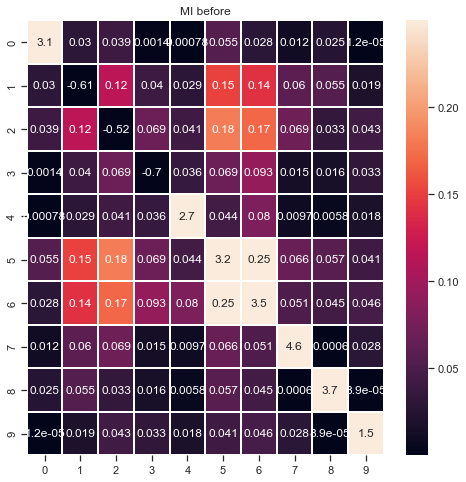

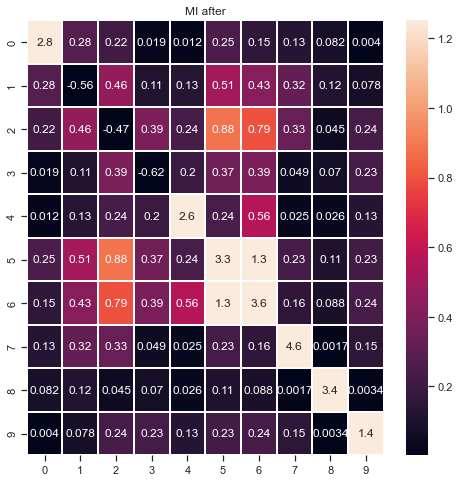


*** Covarience ***


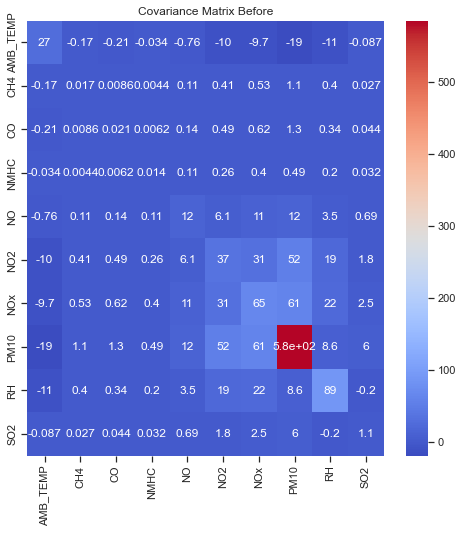

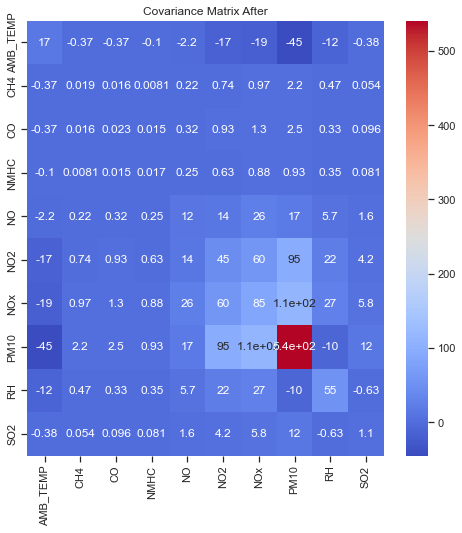


*** Pairplot ***


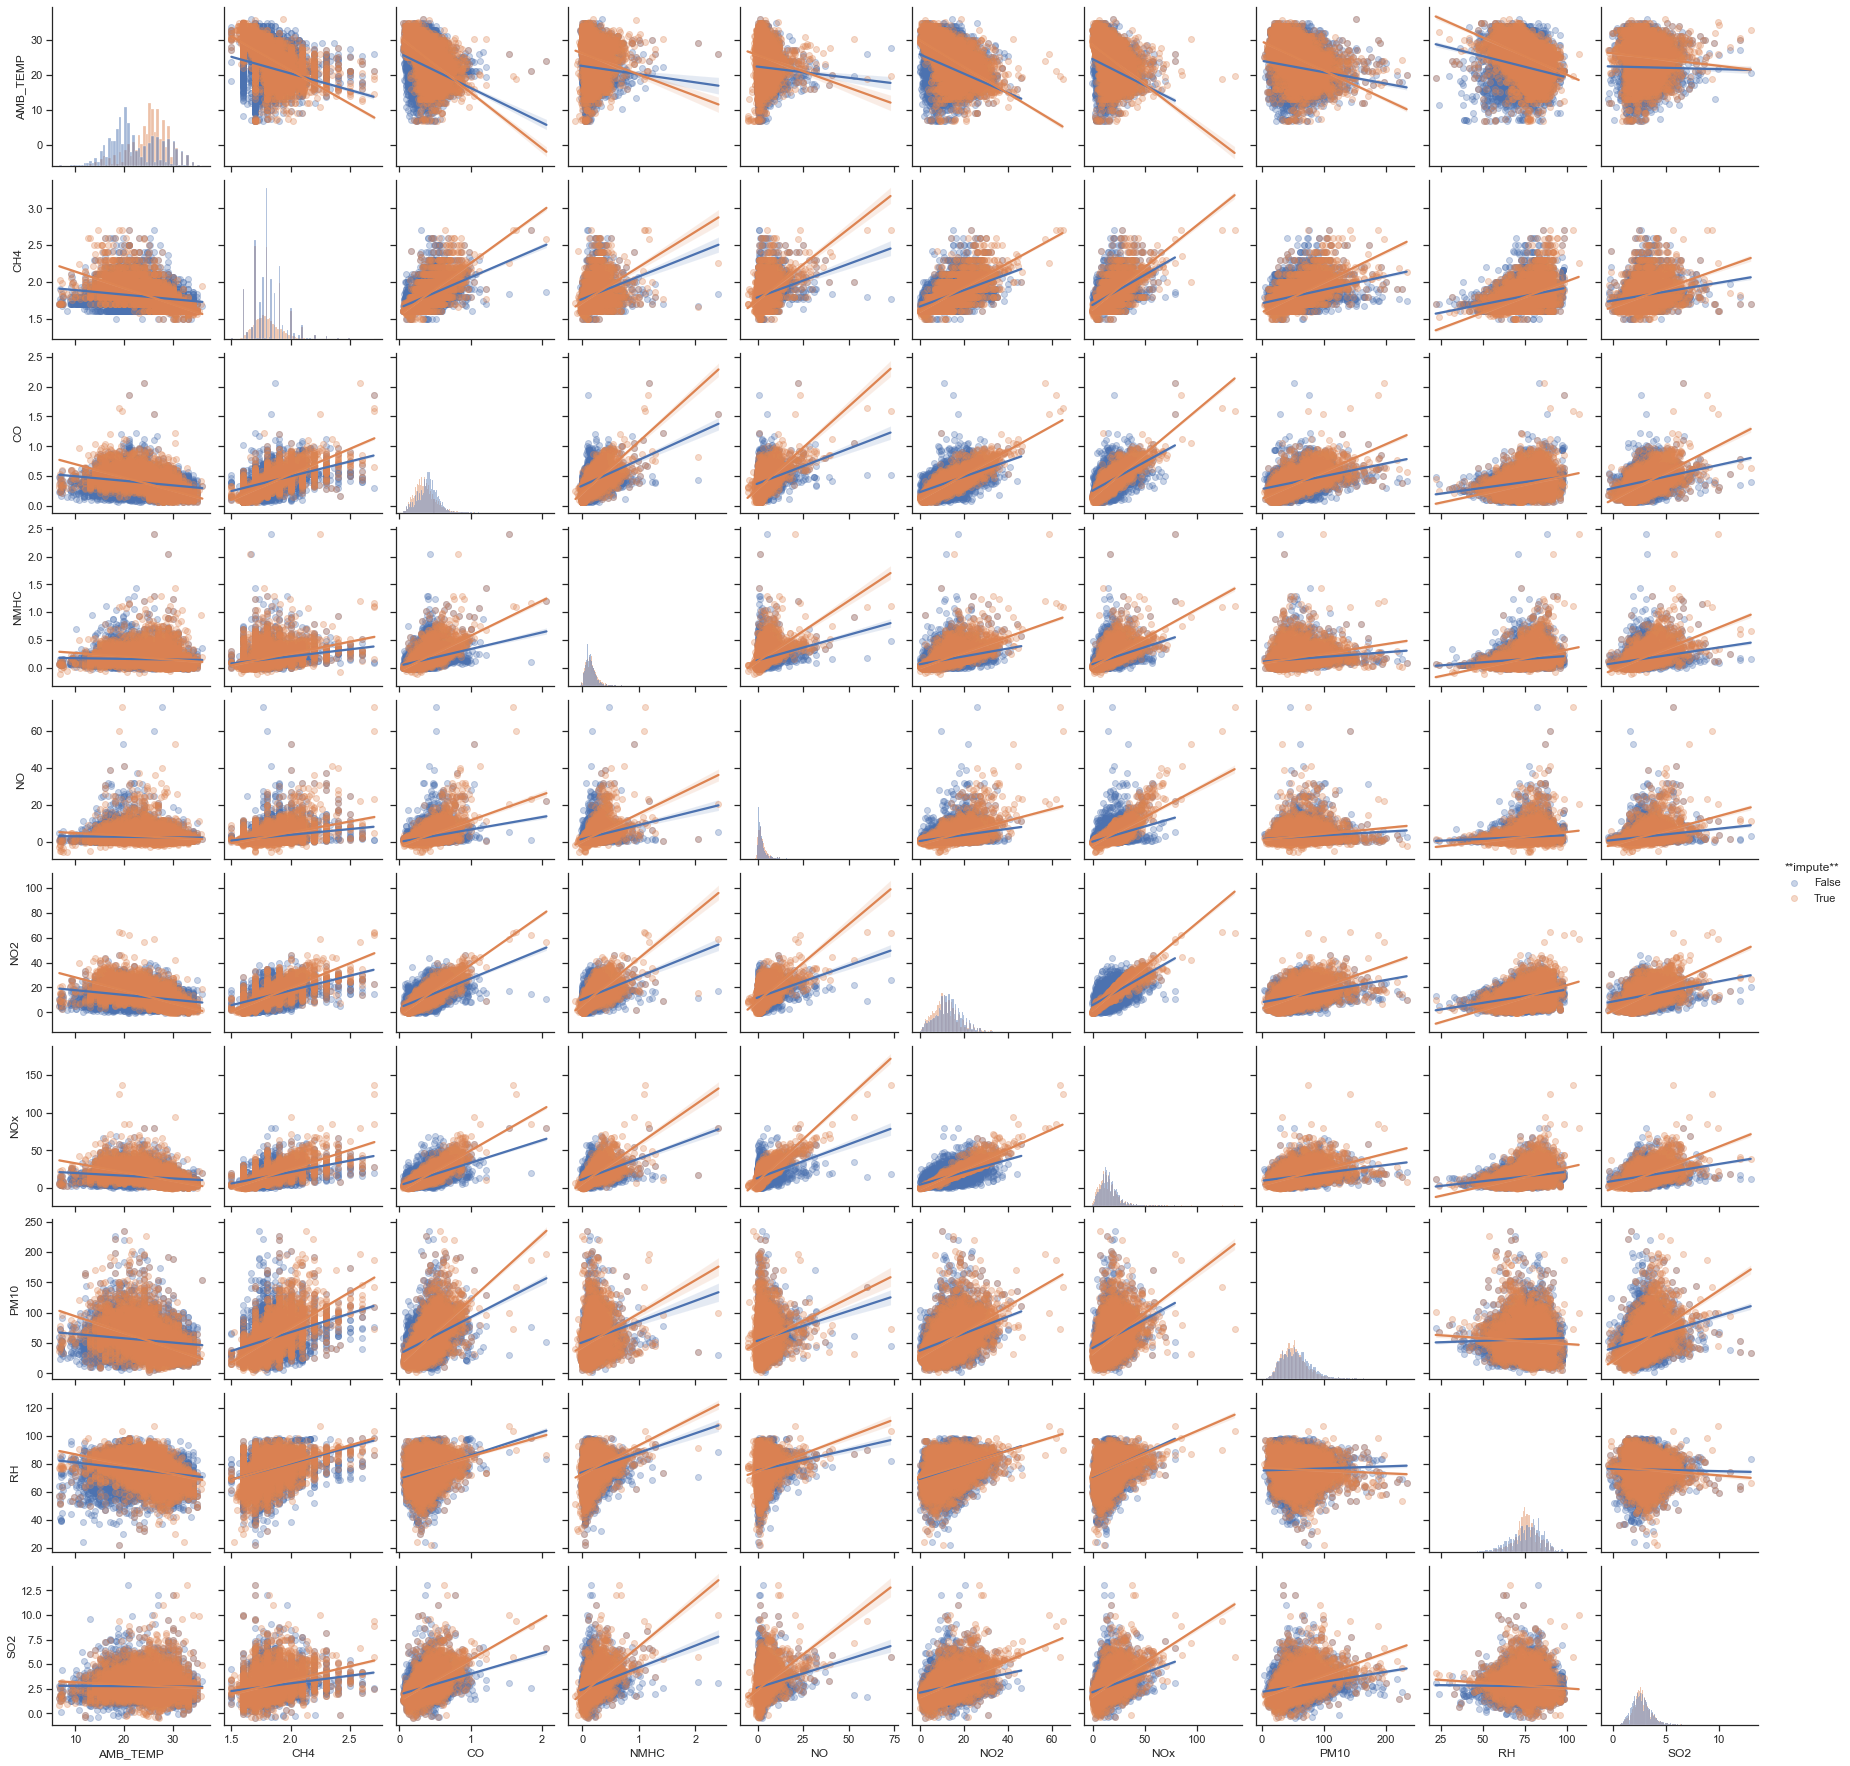

In [30]:
con = continuous()
frame = con.comparison(knn_X_df, result_imputed['X_imputed'])